# Starter Task 1

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp
import pandas as pd

In [2]:
x = random.gauss(10, 2)
print(x)

10.121782332845882


In [3]:
y = random.uniform(1, 10)
print(y)

2.298064665013651


In [4]:
z = np.random.normal(loc=10, scale=2.0, size=5000)

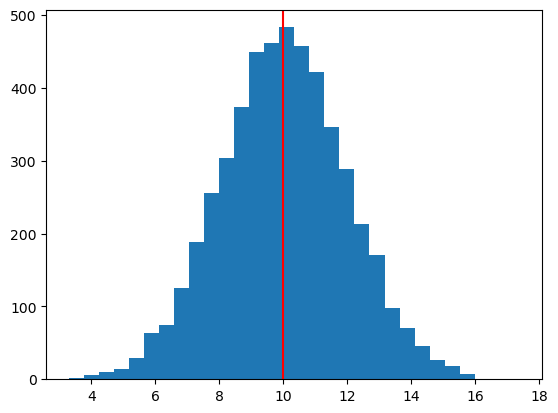

In [5]:
plt.hist(z,bins = 30)
plt.axvline(10,color = 'r')

In [6]:
def gauss(mean, sd, size):
    data = []
    for i in range(size):
        x = random.gauss(mean, sd)
        data.append(x)
    actual_mean = np.mean(data)
    print("Calculated mean of data: ", actual_mean)
    variance = np.var(data)
    print("Calculated variance of data: ", variance)
    sd_actual = variance**0.5
    print("Calculated standard deviation of data: ", sd_actual)
    plt.plot()
    plt.hist(data,bins = 30)
    plt.axvline(mean, color = 'red', label = 'Selected mean')
    plt.axvline(actual_mean, color = 'yellow', label = 'Actual mean')
    plt.title(f"Gauss Distribution with mean {mean} and standard deviation {sd} ")
    plt.legend()
    plt.show()

Calculated mean of data:  9.975756338558067
Calculated variance of data:  3.97752232542553
Calculated standard deviation of data:  1.9943726646305424


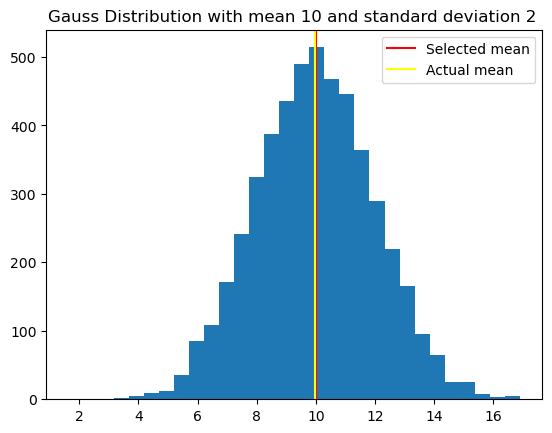

In [7]:
gauss(10,2,5000)

In [8]:
def uniform(a, b, size):
    data = []
    for i in range(size):
        x = random.uniform(a, b)
        data.append(x)
    actual_mean = np.mean(data)
    print("Calculated mean of data: ", actual_mean)
    variance = np.var(data)
    print("Calculated variance of data: ", variance)
    sd_actual = variance**0.5
    print("Calculated standard deviation of data: ", sd_actual)
    plt.plot()
    plt.hist(data,bins = 30)
    plt.axvline((b-a)/2 + 1, color = 'red', label = 'Expected mean')
    plt.axvline(actual_mean, color = 'magenta', label = 'Actual mean')
    plt.title(f"Uniform Distribution between {a} and {b}")
    plt.legend()
    plt.show()
    

Calculated mean of data:  5.481377928263134
Calculated variance of data:  6.658370782362501
Calculated standard deviation of data:  2.5803819063004028


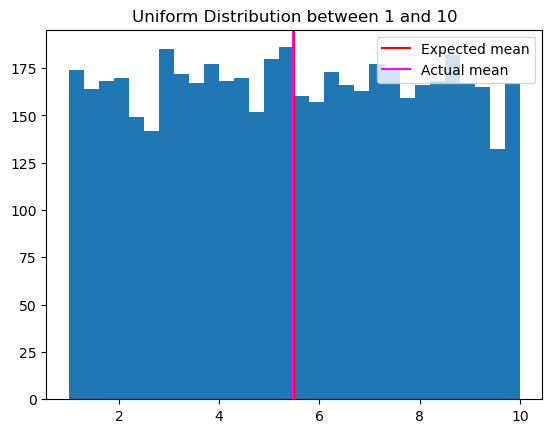

In [9]:
uniform(1,10,5000)

In [10]:
def exponential(mean,size):
    data = []
    for i in range(size):
        x = random.expovariate(1/mean)
        data.append(x)
    actual_mean = np.mean(data)
    print("Calculated mean of data: ", actual_mean)
    print("inputed mean of data: ", mean)
    plt.hist(data, bins = 30)
    plt.title(f"Exponential Distribution with lambda = {1/mean}")
    plt.show()

Calculated mean of data:  -4.980644050820954
inputed mean of data:  -5


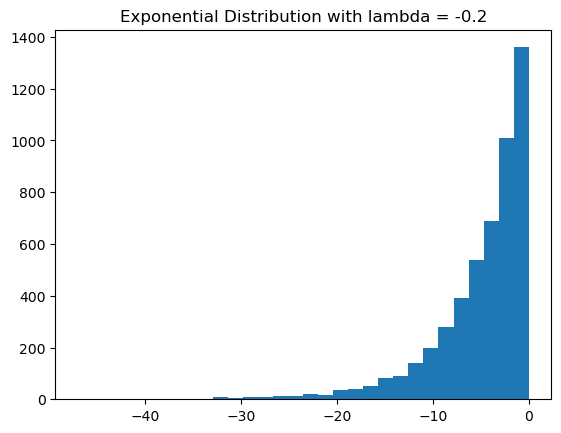

In [11]:
exponential(-5,5000)

# Starter Task 2

In [12]:
# Function to integrate
def f(x):
    return 0.5*np.cos(x)**2

# Analytical solution for comparison
analytical_solution = sp.quad(f, 0, 2)[0]

In [13]:
# Monte Carlo Integration
def monte_carlo_integration(f, a, b, N):
    x_rand = np.random.uniform(a, b, N)
    integral_estimate = (b - a) * np.mean(f(x_rand))
    error_estimate = (b - a) * np.std(f(x_rand)) / np.sqrt(N)
    return integral_estimate, error_estimate

In [14]:
def trapezium_rule(f, a, b, N):
    x = np.linspace(a, b, N)
    y = f(x)
    estimate = np.trapz(y, x)
    error = ((b-a)**3 / (12*N**2)) * max(np.abs(np.gradient(np.gradient(y, x), x)))
    return estimate, error

In [15]:
# Simpson's Rule
def simpsons_rule(f, a, b, N):
    x = np.linspace(a, b, N)
    y = f(x)
    estimate = sp.simps(y, x)
    error = ((b-a)**5 / (180*N**4)) * max(np.abs(np.gradient(np.gradient(np.gradient(np.gradient(y, x), x), x), x)))
    return estimate, error

In [16]:
# Run integration methods
N = 1000
mc_result, mc_error = monte_carlo_integration(f, 0, 2, N)
trapezium_result, tp_error = trapezium_rule(f, 0, 2, N)
simpsons_result, sp_error = simpsons_rule(f, 0, 2, N)

Mean integral estimate = 0.40532241400438634
Mean error estimate = 0.011460997344912226
Standard deviation = 0.01165241360964963


Text(0.5, 0, 'Monte Carlo Integral Estimate')

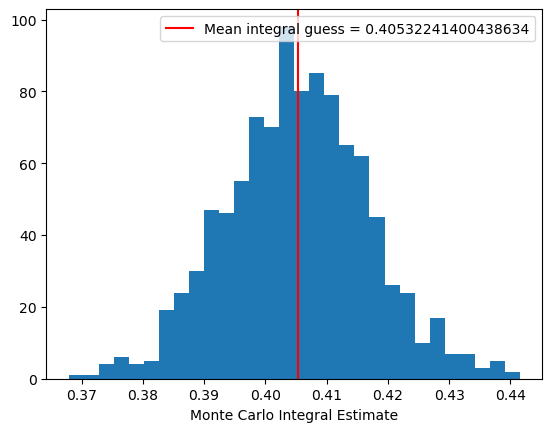

In [17]:
estimate = []
error = []
for i in range(1000):
    integral_estimate, error_estimate = monte_carlo_integration(f,0,2,N)
    estimate.append(integral_estimate)
    error.append(error_estimate)
    
mc_mean = np.mean(estimate)
print(f"Mean integral estimate = {mc_mean}")
mc_error = np.mean(error)
print(f"Mean error estimate = {mc_error}")
sd = np.std(estimate)
print(f"Standard deviation = {sd}")
plt.hist(estimate, bins = 30)
plt.axvline(mc_mean,color = 'red',label=f'Mean integral guess = {mc_mean}')
plt.legend()
plt.xlabel('Monte Carlo Integral Estimate')

In [18]:
# Print Results
print(f"Analytical Solution: {analytical_solution:.6f}")
print(f"Monte Carlo Estimate: {mc_mean:.6f} ± {mc_error:.6f}")
print(f"Trapezium Rule Estimate: {trapezium_result:.6f} ± {tp_error:.6f}")
print(f"Simpson's Rule Estimate: {simpsons_result:.6f} ± {tp_error:.6f}")

Analytical Solution: 0.405400
Monte Carlo Estimate: 0.405322 ± 0.011461
Trapezium Rule Estimate: 0.405400 ± 0.000001
Simpson's Rule Estimate: 0.405400 ± 0.000001


In [19]:
mc_diff = abs(mc_mean - analytical_solution)
trap_diff = abs(trapezium_result - analytical_solution)
simps_diff = abs(simpsons_result - analytical_solution)

In [20]:
data = {
    "Method": ["Monte Carlo", "Trapezium Rule", "Simpson's Rule", "Analytical"],
    "Estimate": [mc_mean, trapezium_result, simpsons_result, analytical_solution],
    "Error": [mc_error, tp_error, sp_error, 0],
    "Abs Difference": [mc_diff, trap_diff, simps_diff, 0]
}

df = pd.DataFrame(data)
df

,Method,Estimate,Error,Abs Difference
0,Monte Carlo,0.405322,1.146100e-02,7.727408e-05
1,Trapezium Rule,0.405400,6.666623e-07,1.263864e-07
2,Simpson's Rule,0.405400,5.545154e-09,1.144640e-12
3,Analytical,0.405400,0.000000e+00,0.000000e+00


# Starter Task 3

In [2]:
def f(x1,x2):
    return x1**2 + x2**2 < 1

In [3]:
def analytical_f(x1,x2):
    return f(x1,x2)

def analytical_integral(a,b):
    analytical_solution = sp.nquad(analytical_f, [(a, b), (a, b)])
    return analytical_solution

print(analytical_integral(-1,1)[0])

/opt/conda/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


3.1421278363209537


In [4]:
def monte_carlo_multi(f,a,b,N,n):
    x1 = np.random.uniform(a,b,N)
    x2 = np.random.uniform(a,b,N)
    integral_estimate = ((b-a)**n)*np.mean(f(x1,x2))
    error_estimate = ((b - a)**n) * np.std(f(x1,x2)) / np.sqrt(N)
    return integral_estimate, error_estimate

In [10]:
def trapezium_rule_2d(f, a, b, N):
    x1 = np.linspace(a, b, N)
    x2 = np.linspace(a, b, N)
    X1, X2 = np.meshgrid(x1, x2)  # Create 2D grid
    Z = f(X1, X2)  # Evaluate function on grid
    integral_x = np.trapz(Z, x1, axis=1)
    integral_total = 2*np.trapz(integral_x, x2)
    error_estimate = np.abs(np.pi - integral_total)
    
    return integral_total, error_estimate

In [6]:
from scipy.integrate import simps
def simpsons_rule_2d(f, a, b, N):
    x1 = np.linspace(a, b, N)
    x2 = np.linspace(a, b, N)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)
    integral_x = sp.simps(Z, x1, axis=1)
    integral_total = sp.simps(integral_x, x2)
    error_estimate = np.abs(np.pi - integral_total)
    
    return integral_total, error_estimate

Mean integral estimate = 3.1417352000000003
Mean error estimate = 0.0164196526779522
Standard deviation = 0.01622964081426327


Text(0.5, 0, 'Monte Carlo Integral Estimate')

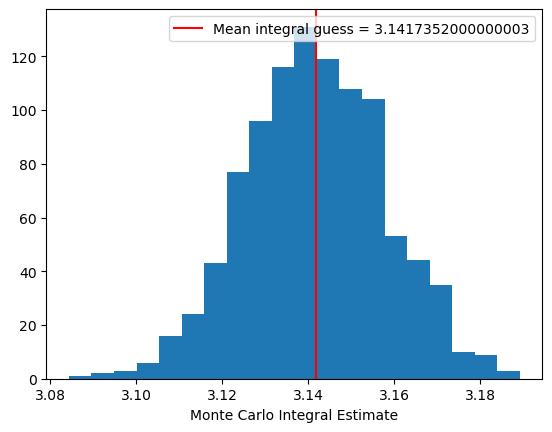

In [11]:
estimate = []
error = []

for i in range(1000):
    integral_estimate, error_estimate = monte_carlo_multi(f,-1,1,10000,2)
    estimate.append(integral_estimate)
    error.append(error_estimate)
    
mc_mean = np.mean(estimate)
print(f"Mean integral estimate = {mc_mean}")
mc_error = np.mean(error)
print(f"Mean error estimate = {mc_error}")
sd = np.std(estimate)
print(f"Standard deviation = {sd}")
plt.hist(estimate, bins = 20)
plt.axvline(mc_mean,color = 'red',label=f'Mean integral guess = {mc_mean}')
plt.legend()
plt.xlabel('Monte Carlo Integral Estimate')

In [12]:
print(f"Estimated Integral: {mc_mean:.6f}")
print(f"Monte Carlo Error Estimate: {error_estimate:.6f}")
print(f"Absolute Difference from π: {abs(mc_mean - np.pi):.6f}")

Estimated Integral: 3.141735
Monte Carlo Error Estimate: 0.016485
Absolute Difference from π: 0.000143


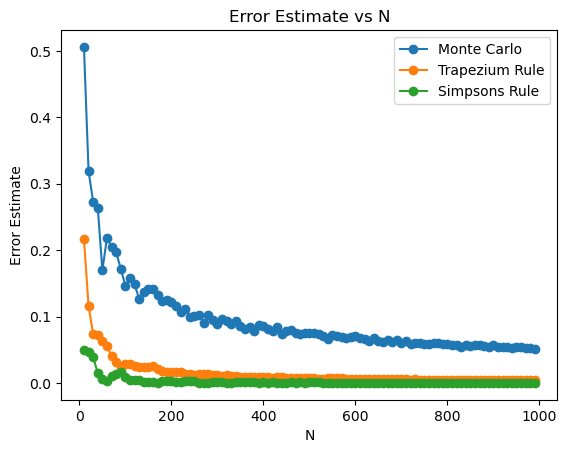

In [13]:
N_values = np.arange(10,1000,10)
error_values = []
estimate_values = []
trapz_error = []
simps_error = []

for N in N_values:
    integral_estimate, error_estimate = monte_carlo_multi(f,-1,1,N,2)
    error_values.append(error_estimate)
    estimate_values.append(integral_estimate)
    _,error = trapezium_rule_2d(f, -1, 1, N)
    trapz_error.append(error)
    _,error_simps = simpsons_rule_2d(f, -1, 1, N)
    simps_error.append(error_simps)
    
plt.figure()
plt.plot(N_values, error_values, '-o', label = 'Monte Carlo')
plt.plot(N_values, trapz_error, '-o', label = 'Trapezium Rule')
plt.plot(N_values, simps_error, '-o', label = 'Simpsons Rule')
plt.xlabel("N")
plt.ylabel("Error Estimate")
plt.title("Error Estimate vs N")
plt.legend()
plt.show()

# Extension Task 1

In [71]:
def f(x):
    return np.sum(x**2) < 1

In [73]:
def monte_carlo_multi(f,a,b,N,n):
    x_samples = np.random.uniform(a, b, (n, N))  # Generate N points in n dimensions
    integral_estimate = ((b - a) ** n) * np.mean([f(x_samples[:, i]) for i in range(N)])  # Mean directly
    error_estimate = ((b - a) ** n) * np.std([f(x_samples[:, i]) for i in range(N)]) / np.sqrt(N)  # Error directly
    
    return integral_estimate, error_estimate

Mean integral estimate = 4.9405280000000005
Mean error estimate = 0.23360914389921714
Standard deviation = 0.2380883391012673


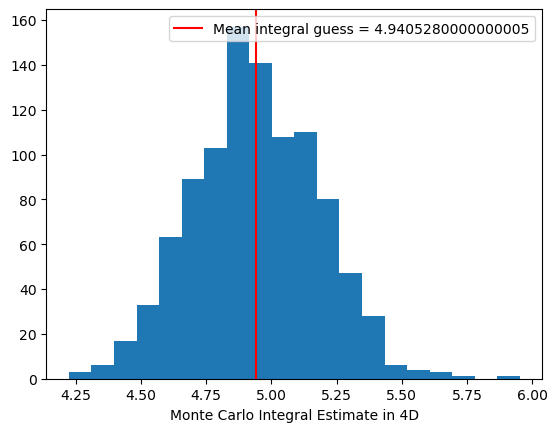

In [75]:
estimate = []
error = []
n = 4

for i in range(1000):
    integral_estimate, error_estimate = monte_carlo_multi(f,-1,1,1000,n)
    estimate.append(integral_estimate)
    error.append(error_estimate)
    
mc_mean = np.mean(estimate)
print(f"Mean integral estimate = {mc_mean}")
mc_error = np.mean(error)
print(f"Mean error estimate = {mc_error}")
sd = np.std(estimate)
print(f"Standard deviation = {sd}")

plt.figure()
plt.hist(estimate, bins = 20)
plt.axvline(mc_mean,color = 'red',label=f'Mean integral guess = {mc_mean}')
plt.legend()
plt.xlabel(f'Monte Carlo Integral Estimate in {n}D')
plt.show()

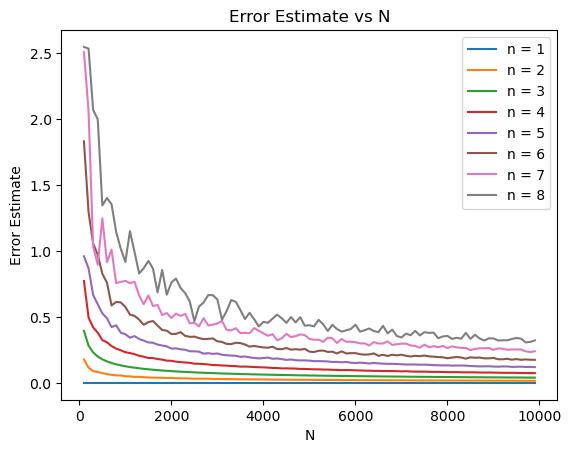

In [79]:
N_values = np.arange(100,10000,100)
dimensions = [1,2,3,4,5,6,7,8]
error_values = []
estimate_values = []

plt.figure()

for n in dimensions:
    error_values = []
    estimate_values = []

    for N in N_values:
        integral_estimate, error_estimate = monte_carlo_multi(f,-1,1,N,n)
        error_values.append(error_estimate)
        estimate_values.append(integral_estimate)
    
    plt.plot(N_values, error_values, '-', label = f'n = {n}')
    plt.xlabel("N")
    plt.ylabel("Error Estimate")
    plt.title("Error Estimate vs N")
plt.legend()
plt.show()

# Extension Task 2

In [42]:
def f(x1, x2, alpha):
    r = np.sqrt(x1**2 + x2**2) 
    if r < 1:
        return r**alpha
    else:
        return 0

In [52]:
def monte_carlo_multi(a, b, N, n, alpha):
    x1_samples = np.random.uniform(a, b, N)
    x2_samples = np.random.uniform(a, b, N)
    f_samples = np.array([f(x1,x2,alpha) for x1,x2 in zip(x1_samples,x2_samples)])
    integral_estimate = ((b - a)**n)* np.mean(f_samples)  # Compute integral
    error_estimate = ((b - a)**n)*np.std(f_samples) / np.sqrt(N)  # Compute error
    return integral_estimate, error_estimate

In [59]:
def trapezium_rule_2d(f, a, b, N, alpha):
    x1 = np.linspace(a, b, N)
    x2 = np.linspace(a, b, N)
    X1, X2 = np.meshgrid(x1, x2)  # Create 2D grid
    Z = f(X1, X2, alpha)  # Evaluate function on grid
    integral_x = np.trapz(Z, x1, axis=1)
    integral_total = 2*np.trapz(integral_x, x2)
    error_estimate = np.abs(np.pi - integral_total)
    
    return integral_total, error_estimate

In [61]:
from scipy.integrate import simps
def simpsons_rule_2d(f, a, b, N, alpha):
    x1 = np.linspace(a, b, N)
    x2 = np.linspace(a, b, N)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2, alpha)
    integral_x = sp.simps(Z, x1, axis=1)
    integral_total = sp.simps(integral_x, x2)
    error_estimate = np.abs(np.pi - integral_total)
    
    return integral_total, error_estimate

In [36]:
def evaluate(alpha_values, N_values):
    results = {}
    for a in alpha_values:
        integral = []
        errors = []

        for N in N_values:
            integral_estimate, error_estimate = monte_carlo_multi(-1, 1, N, 2, a)
            integral.append(integral_estimate)
            errors.append(error_estimate)

        results[a] = (integral, errors)
        
    return results


In [37]:
def plot(alpha_values, N_values, results):
    plt.figure(figsize = (10,6))
    
    for a in alpha_values:
        _,errors = results[a]
        plt.loglog(N_values, errors, label = rf'$\alpha = {a}$', marker = 'o', linestyle =  '-')
        
    plt.xlabel('Number of samples (N)') 
    plt.ylabel('Error')
    plt.title('Monte Carlo Estimate error for $r^\\alpha$')
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()

In [38]:
alpha_values = np.arange(-2,0.5,0.5)
N_values = [10, 50, 500, 1000, 5000, 100000, 500000, 1000000]
N_values = [10, 50, 100, 500, 1000, 5000, 10000, 15000, 50000, 75000, 100000, 250000, 500000, 1000000]

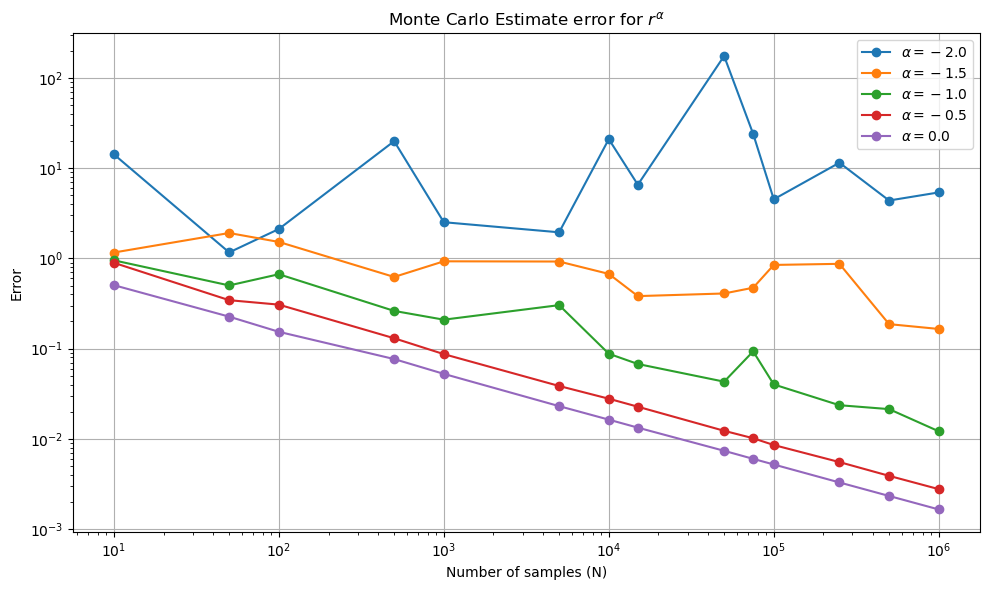

In [39]:
results = evaluate(alpha_values, N_values)
plot(alpha_values,N_values,results)

Alpha = -2.0: Monte Carlo Estimate = 43.698537, Error = 13.461982
Alpha = -1.9: Monte Carlo Estimate = 26.879130, Error = 2.885471
Alpha = -1.7999999999999998: Monte Carlo Estimate = 26.217256, Error = 7.743750
Alpha = -1.6999999999999997: Monte Carlo Estimate = 15.914619, Error = 0.923342
Alpha = -1.5999999999999996: Monte Carlo Estimate = 16.751522, Error = 1.871540
Alpha = -1.4999999999999996: Monte Carlo Estimate = 11.211644, Error = 0.422010
Alpha = -1.3999999999999995: Monte Carlo Estimate = 10.157036, Error = 0.372386
Alpha = -1.2999999999999994: Monte Carlo Estimate = 9.224983, Error = 0.473253
Alpha = -1.1999999999999993: Monte Carlo Estimate = 8.121304, Error = 0.401093
Alpha = -1.0999999999999992: Monte Carlo Estimate = 6.845301, Error = 0.115606
Alpha = -0.9999999999999991: Monte Carlo Estimate = 6.117108, Error = 0.088569
Alpha = -0.899999999999999: Monte Carlo Estimate = 5.651079, Error = 0.068678
Alpha = -0.7999999999999989: Monte Carlo Estimate = 5.293398, Error = 0.052

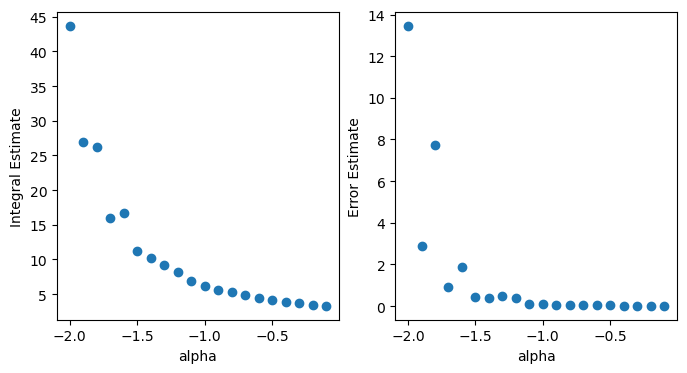

In [40]:
alpha_values = np.arange(-2,0,0.1)
estimates = []
errors = []

for alpha in alpha_values:
    integral_estimate, error_estimate = monte_carlo_multi(-1, 1, 10000, 2, alpha)
    estimates.append(integral_estimate)
    errors.append(error_estimate)
    print(f"Alpha = {alpha}: Monte Carlo Estimate = {integral_estimate:.6f}, Error = {error_estimate:.6f}")

plt.figure(figsize = (8,4))
plt.tight_layout()
plt.subplot(121)
plt.plot(alpha_values, estimates, 'o')
plt.xlabel("alpha")
plt.ylabel("Integral Estimate")
plt.subplot(122)
plt.plot(alpha_values, errors, 'o')
plt.xlabel("alpha")
plt.ylabel("Error Estimate")
plt.show()

# Extension Task 3

In [129]:
def mc(n):
    x = np.random.randn(n,1)
    g = 10 * np.exp(-5 * (x - 3) ** 4)
    MC = np.mean(g)
    return MC

def IS(n):
    y = 3 + np.random.randn(n, 1);
    g = 10 * np.exp(-5 * (y  - 3) ** 4);
    g_weighted = g * norm.pdf(y, 0, 1) / norm.pdf(y, 3, 1);
    IS_integral = np.mean(g_weighted)  
    return IS_integral

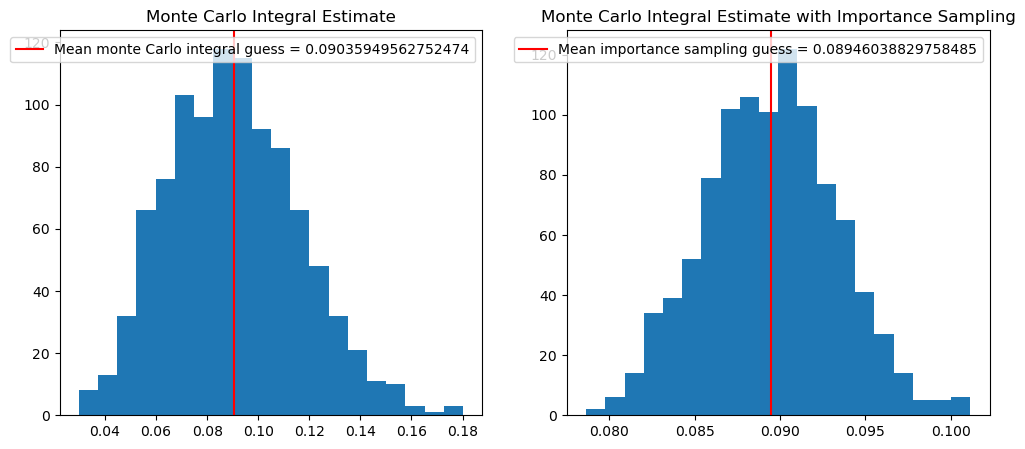

Standard Deviation for normal Monte Carlo Estimate: 0.02562593606461747
Standard Deviation for Monte Carlo Estimate with Importance Sampling: 0.003827613174656089


In [131]:
MC_estimate = []
IS_estimate = []

for i in range(1000):
    MC = mc(1000)
    MC_estimate.append(MC)
    IS_integral = IS(1000)
    IS_estimate.append(IS_integral)

MC_mean = np.mean(MC_estimate)
IS_mean = np.mean(IS_estimate)
MC_std = np.std(MC_estimate)
IS_std = np.std(IS_estimate)

plt.figure(figsize = (12,5))
plt.tight_layout()
plt.subplot(121)
plt.hist(MC_estimate, bins =20)
plt.axvline(MC_mean,color = 'red',label=f'Mean monte Carlo integral guess = {MC_mean}')
plt.title('Monte Carlo Integral Estimate')
plt.legend()

plt.subplot(122)
plt.hist(IS_estimate, bins=20)
plt.axvline(IS_mean,color = 'red',label=f'Mean importance sampling guess = {IS_mean}')
plt.title('Monte Carlo Integral Estimate with Importance Sampling')
plt.legend()

plt.show()

print(f"Standard Deviation for normal Monte Carlo Estimate: {MC_std}")
print(f"Standard Deviation for Monte Carlo Estimate with Importance Sampling: {IS_std}")